# Cluster Analysis

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

A **cluster** is a group of items with similar characteristics (customers with similar habits, news about the same topics...)

Clustering algorithms: 
- Hierarchical clustering
- K Means Clustering
- DBScan, Gaussian methods...

## Hierarchical clustering 

Steps of **hierarchical clustering**:
- Initially, there is a cluster pero observation.
- We calculate distances between each pair of datapoints.
- The closest 2 datapoints are merged in a single cluster
- This process continues till we reach the desired amount of clusters.

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
                10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.01]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
                47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd. DataFrame({'x_coordinate': x_coordinates,
                    'y_coordinate': y_coordinates})

In [ ]:
sns.scatterplot(data=df, x='x_coordinate', y='y_coordinate')

In [ ]:
Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

In [ ]:
sns.scatterplot(data=df, x='x_coordinate', y='y_coordinate', hue='cluster_labels')

A critical part in the scipy implementation is creating the distance matrix using [**linkage**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

Once we have the matrix of distances, we can perform the [**fcluster**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

There is no single method that applies to every single problem. Read carefully the documentation and invest in understanding your data before going to one or another method.

In [ ]:
Z

# Visualizing Clusters

Helps making sense of the clusters formed, validating the clusters identified and eventually helps spotting trends in data.

## With matplotlib

In [ ]:
df = pd. DataFrame({'x': [2, 3, 5, 6, 2],
                    'y': [1, 1, 5, 5, 2],
                    'labels': ['A', 'A', 'B', 'B', 'A']})
colors = {'A': 'red', 'B': 'blue'}

df.plot.scatter(x='x', y='y', 
                c=df['labels'].apply(lambda x: colors[x]))

## With seaborn

In [ ]:
sns.scatterplot(data=df, x='x', y='y', hue='labels')

## How many clusters?

**Dendrograms** are branching diagrams that show how each cluster is composed by branching out into its child nodes.

In [ ]:
from scipy.cluster.hierarchy import dendrogram

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
                10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.01]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
                47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd. DataFrame({'x_coordinate': x_coordinates,
                    'y_coordinate': y_coordinates})

Z = linkage(df[['x_coordinate', 'y_coordinate']],
            method='ward',
            metric='euclidean')

dn = dendrogram(Z)
plt.show()

The x axis represents the individual datapoints, while the y axis represents the distance between them.

At any heightm a horizontal line shows the number of clusters at that stage. Inter cluster disntace can be found by the y value at the join point.

# Limitations of hierarchical clustering

The linkage step takes a lot of time and it grows quadratically, what makes it unusable with big amounts of data.



## Kmeans

Steps:
- Cluster centroids are randomly initiallized.
- Distances from each datapoint to each cluster center is calculated.
- Datapoints are asigned to the closest centroid.
- Cluster centers are recalculated based on the datapoints assigned.
- Repeat this for a predefined number of iterations

KMeans runs significantly faster than hierarchical clustering on large datasets

In scipy, the methods are:
- [kmeans](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html) to generate the centers of the clusters (also known as code_book). It returns the **distortion** as well. The distortion is calculated as the sum of squares of the distances of points from cluster centers.
- [vq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html) 

In [ ]:
from scipy.cluster.vq import kmeans, vq

centroids,_ = kmeans(df, 3) # generates cluster centers
df['cluster_labels_kmeans'],_ = vq(df, centroids) 

In [ ]:
df

In [ ]:
sns.scatterplot(data=df, x='x_coordinate', y='y_coordinate', hue='cluster_labels_kmeans')

## How many clusters

Elbow rule based on the global distortion. Sometimes, its not possible to determine the best amount of clusters with this method.

## Limitations of k-means clusterings 

- How to find the right amount of clusters? Elbow is sometimes not enough
- Impact of seeds -> the cluster initialization impacts a lot in the results.
- Biased towards equal size clusters

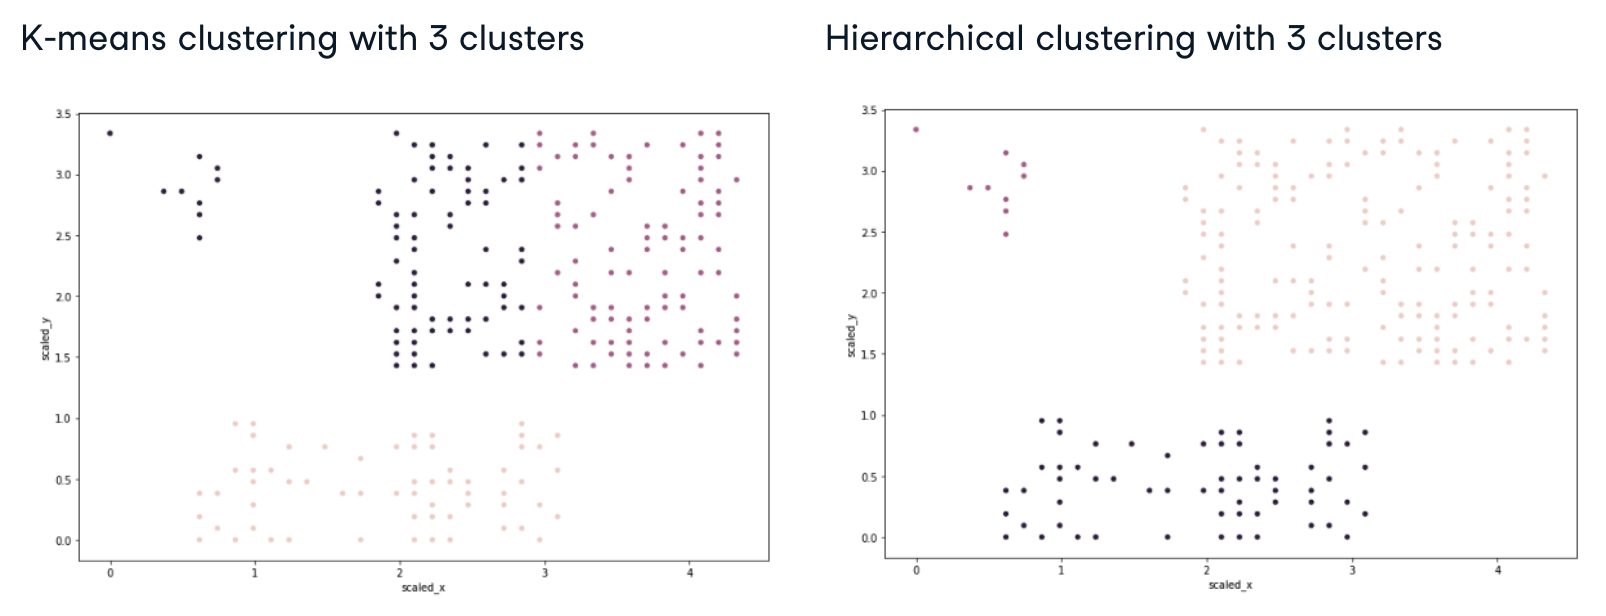

# Data preparation for cluster analysis

Why?
- Variables in incomparable units
- Variables with different scales and variances
- Data in raw form may lead to bias in clustering
- Clusters may be heavily dependent on one variable

Solution: normalization of individual variables

## Normalization of data

Normalization is the process of rescaling data to a standard deviation of 1

$$x\_new = \frac{ x }{ std(x) }$$


In [ ]:
from scipy.cluster.vq import whiten

data = [5,1,3,7,3,5,8,2]

scaled_data = whiten(data)
print(scaled_data)

In [ ]:
plt.plot(data, label='original', c='red')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()

# Clustering with multiple features

In [ ]:
fifa = pd.read_csv('../data/fifa_18_sample_data.csv')
fifa_mini = fifa[['heading_accuracy', 'volleys', 'finishing']]

In [ ]:
fifa_mini['scaled_heading_accuracy'] = whiten(fifa_mini['heading_accuracy'])
fifa_mini['scaled_volleys'] = whiten(fifa_mini['volleys'])
fifa_mini['scaled_finishing'] = whiten(fifa_mini['finishing'])

In [ ]:
distortions = []
num_clusters = range (1, 11)
# Create a list of distortions from the kmeans method

for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa_mini[['scaled_heading_accuracy', 'scaled_volleys' , 'scaled_finishing']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd. DataFrame({'num_clusters': num_clusters, 
                            'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
cluster_centers, distortion = kmeans(fifa_mini[['scaled_heading_accuracy', 'scaled_volleys' , 'scaled_finishing']], 2)

In [ ]:
cluster_centers

In [ ]:
clusters, _ = vq(fifa_mini[['scaled_heading_accuracy', 'scaled_volleys' , 'scaled_finishing']], cluster_centers)

In [ ]:
fifa_mini['cluster_label'] = clusters

In [ ]:
fifa_mini

In [ ]:
fifa_mini.cluster_label.value_counts()

In [ ]:
sns.pairplot(data=fifa_mini[['scaled_heading_accuracy', 'scaled_volleys' , 'scaled_finishing', 'cluster_label']], hue='cluster_label')